In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/heloc_dataset_v1.csv')

In [7]:
df.shape[0]

10459

In [8]:
def label_y(row):
    if row['RiskPerformance'] == 'Good':
        return 1
    else:
        return 0

In [9]:
df['y'] = df.apply(lambda row: label_y(row),axis=1)

In [10]:
del df['RiskPerformance']

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([(SVC(), model_names[0], param_grid_svc), 
            (LogisticRegression(), model_names[1], param_grid_logistic),
            (KNeighborsClassifier(), model_names[2], param_grid_knn),
            (GaussianNB(), model_names[3], param_grid_nb),
            (DecisionTreeClassifier(), model_names[4], param_grid_tree),
            (RandomForestClassifier(), model_names[6], param_grid_rf),
            (AdaBoostClassifier(), model_names[7], param_grid_boost)
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['SVM','LR','KNN','NB','Tree','QDA','RF','Boosting']

# the training parameters of each model
param_grid_svc = [{'C':[0.1,1],'kernel':['rbf','linear'], 'max_iter':[-1],'random_state':[1]}]
param_grid_logistic = [{'C':[0.1,1], 'penalty':['l1','l2'],'random_state':[1]}]
param_grid_knn = [{},{'n_neighbors':[1,2,3,4]}]
param_grid_nb = [{}]
param_grid_tree = [{'random_state':[1]},{'criterion':['gini'], 'max_depth':[2,3], 'min_samples_split':[3,5],'random_state':[1]}]
param_grid_rf = [{'random_state':[1]},{'n_estimators':[10,30],'max_features':[0.2, 0.3], 'bootstrap':[True],'random_state':[1]}]
param_grid_boost = [{'random_state':[1]},{'n_estimators':[10,20],'learning_rate':[0.1,1],'random_state':[1]}]

In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([(SVC(), model_names[0], param_grid_svc), 
            (LogisticRegression(), model_names[1], param_grid_logistic)])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['SVM','LR']

# the training parameters of each model
param_grid_svc = [{'C':[0.1,1],'kernel':['rbf','linear'], 'max_iter':[-1],'random_state':[1]}]
param_grid_logistic = [{'C':[0.1,1], 'penalty':['l1','l2'],'random_state':[1]}]


In [13]:
X = df.drop('y', axis= 1)
# X = X[:1000]
Y = df['y']
# Y = Y[:1000]


In [14]:
models = init_classifiers()

In [15]:
models[1][1]

'LR'

In [ ]:
for model in models:
    
#     X_train, X_test, y_train, y_test = train_test_split(X,Y)

    clf = GridSearchCV(model[0],model[2],cv = 2)

    clf.fit(X,Y)
    
    if model[1] == 'LR':
        coef = clf.coef_[0]
        pos = [x for x in range(0,len(coef))]
        plt.bar(pos,coef, align='center', alpha=0.5)
        
    y_pred = clf.predict(X)

    print('Model ', model)
    acc = accuracy_score(Y,y_pred)
    print('Accuracy ', acc)

### Train the model using all the data, find best hyperparameter

In [ ]:
X = df.drop('y', axis= 1)
# X = X[:1000]
Y = df['y']
# Y = Y[:1000]

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
        clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test.values)
        acc = metrics.accuracy_score(y_pred,y_test)
        
    #  only use new hyper parameter if better by thresh amount
        if(acc > best_acc):
            best_acc = acc
            best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X,Y)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

### Train the model using only the 10 heighest weights from the coefficient graph above

In [ ]:
usecols = [df.columns[0],df.columns[5],df.columns[6],df.columns[9],df.columns[10],df.columns[12],df.columns[15],df.columns[16],df.columns[19],df.columns[-1]]

new_df =  df[usecols]
X = new_df.drop('y', axis= 1)
Y = new_df['y']

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
    clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test.values)
    acc = metrics.accuracy_score(y_pred,y_test)

#  only use new hyper parameter if better by thresh amount
    if(acc > best_acc):
        best_acc = acc
        best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X_train,y_train)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

In [ ]:
print(usecols)
len(usecols)

### Retrained the model with only 7 features 

0.6787762906309751


<BarContainer object of 7 artists>

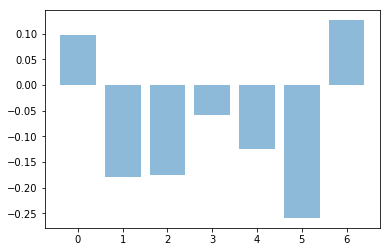

In [17]:
usecols = [df.columns[0],df.columns[5],df.columns[6],df.columns[9],df.columns[10],df.columns[15],df.columns[16],df.columns[-1]]

new_df =  df[usecols]
X = new_df.drop('y', axis= 1)
# X = X[:1000]
Y = new_df['y']
# Y = Y[:1000]

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
        clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test.values)
        acc = metrics.accuracy_score(y_pred,y_test)
        
    #  only use new hyper parameter if better by thresh amount
        if(acc > best_acc):
            best_acc = acc
            best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X_train,y_train)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

### Uses sklearns built in method to select features and retrain model to find performance

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=7)
selector.fit(X, Y)
# Get columns to keep
cols = selector.get_support(indices=True)

In [ ]:
sklearn_cols = []
for col in cols:
    sklearn_cols.append(df.columns[col])
sklearn_cols.append('y')

In [ ]:
new_df =  df[sklearn_cols]
X = new_df.drop('y', axis= 1)
# X = X[:1000]
Y = new_df['y']
# Y = Y[:1000]

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
        clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test.values)
        acc = metrics.accuracy_score(y_pred,y_test)
        
    #  only use new hyper parameter if better by thresh amount
        if(acc > best_acc):
            best_acc = acc
            best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X_train,y_train)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

### Retrain model on all data and test on one sample

In [18]:
clf.fit(new_df[usecols[:-1]].values,new_df[usecols[-1]].values)
sample_test = [[60,2,1,4,5,2,0]]
clf.predict(sample_test)[0]

0

In [35]:
df = pd.read_csv('../data/heloc_dataset_v1.csv')
df = pd.DataFrame(df)

data_cutoffs = {}

cols = ['ExternalRiskEstimate', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumInqLast6M', 'NumInqLast6Mexcl7days']
for i in cols:
#     print(df[i].describe())
    percentiles = pd.Series(df[i])
    x = percentiles.quantile([.4,.6])
    vals = x.values                            
    if i == cols[0] or i == cols[6]:
         data_cutoffs[i] = [-1 * vals[1], -1 * vals[0]]
    else:
        data_cutoffs[i] = [vals[0], vals[1]]

# GUI

In [37]:
# %%python
from tkinter import Tk, Label, Button, Entry, IntVar, StringVar, END, W, E

class Calculator:

    def __init__(self, master):
        self.master = master
        master.title("Sub Prime Mortgage")
        vcmd = master.register(self.validate) # we have to wrap the command
        
        # LISTS TO CONTAIN REFERENCES TO WIDGETS
        self.param_values = list()
        self.param_value_types = list()
        self.param_labels = list()
        self.param_entries = list()
        
        # CREATING WIDGETS (ENTRIES AND LABELS)
        for var in cols:
            param_value = 0
            param_label = Label(master, text=var)
            param = IntVar()
            param.set(param_value)
            param_entry = Entry(master, validate="key", validatecommand=(vcmd, '%P'))
            
            self.param_values.append(param_value)
            self.param_labels.append(param_label)
            self.param_value_types.append(param)
            self.param_entries.append(param_entry)
        
        self.result_label_text = StringVar()
        self.result_label = Label(master, textvariable=self.result_label_text)
        self.submit_button = Button(master, text="Submit", command=lambda: self.update("submit"))
        
        # LAYOUT
        for i in range(0, len(self.param_labels)):
            self.param_labels[i].grid(row=i, column=0, sticky=W)
            self.param_entries[i].grid(row=i, column=1, columnspan=2, sticky=E)
        self.submit_button.grid(row=len(self.param_entries), column=1)
        self.result_label.grid(row=len(self.param_entries) + 1, column=1)

    def validate(self, new_text):
        if not new_text: # the field is being cleared
            self.entered_number = 0
            return True 
        try:
            self.entered_number = int(new_text)
            return True
        except ValueError:
            return False

    def update_background_color(self):
        i = 0
        for entry in self.param_entries:
            param = cols[i]
            threshold = data_cutoffs[param]
            entry_value = float(entry.get())
            
            # case where coefficients are positive
            if param == 'ExternalRiskEstimate' or param == 'NumInqLast6Mexcl7days':
                entry_value = entry_value * -1 if entry_value == abs(entry_value) else entry_value

            if entry_value < threshold[0]:
                entry.config({"background": "#baef56"}) # green
            elif entry_value < threshold[1]:
                entry.config({"background": "#fffd9b"}) # yellow
            else:
                entry.config({"background": "#f7c0c0"}) # red
            i = i + 1
    
    def update_result_label(self):
        entry_vals = [[float(entry.get()) for entry in self.param_entries]]
        prediction = clf.predict(entry_vals)[0]
        self.result_label_text.set("Result: " + str(prediction))

    def update(self, method):
        if method == "submit":
            self.update_background_color()
            self.update_result_label()            
                
root = Tk()
my_gui = Calculator(root)
root.mainloop()